<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Refactoring-&amp;-Visualisation-of-the-4th-dimension" data-toc-modified-id="Refactoring-&amp;-Visualisation-of-the-4th-dimension-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Refactoring &amp; Visualisation of the 4th dimension</a></span></li><li><span><a href="#Voronoi-cells-and-their-areas" data-toc-modified-id="Voronoi-cells-and-their-areas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Voronoi cells and their areas</a></span></li><li><span><a href="#Position-grids-and-Voronoi-volumes" data-toc-modified-id="Position-grids-and-Voronoi-volumes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Position grids and Voronoi volumes</a></span><ul class="toc-item"><li><span><a href="#Distances-between-centers" data-toc-modified-id="Distances-between-centers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distances between centers</a></span></li><li><span><a href="#Division-area-between-cells" data-toc-modified-id="Division-area-between-cells-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Division area between cells</a></span></li><li><span><a href="#Volume-of-cells" data-toc-modified-id="Volume-of-cells-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Volume of cells</a></span></li></ul></li><li><span><a href="#Back-mapping-molecular-positions-to-grid-points" data-toc-modified-id="Back-mapping-molecular-positions-to-grid-points-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Back-mapping molecular positions to grid points</a></span><ul class="toc-item"><li><span><a href="#Simulation-data-assignment" data-toc-modified-id="Simulation-data-assignment-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simulation data assignment</a></span></li><li><span><a href="#Molgri-data-assignment" data-toc-modified-id="Molgri-data-assignment-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Molgri data assignment</a></span></li></ul></li><li><span><a href="#Transion/rate-matrix" data-toc-modified-id="Transion/rate-matrix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transion/rate matrix</a></span><ul class="toc-item"><li><span><a href="#Transition-matrix" data-toc-modified-id="Transition-matrix-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Transition matrix</a></span></li><li><span><a href="#Rate-matrix" data-toc-modified-id="Rate-matrix-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Rate matrix</a></span></li></ul></li></ul></div>

In [1]:
import sys
import os

os.chdir(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup/molgri")
sys.path.append(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi
import pandas as pd
import seaborn as sns

from molgri.space.rotobj import SphereGridFactory, ConvergenceSphereGridFactory
from molgri.space.fullgrid import FullGrid, FullVoronoiGrid
from molgri.plotting.spheregrid_plots import *
from molgri.plotting.fullgrid_plots import *
from molgri.plotting.abstract import show_anim_in_jupyter
from molgri.constants import DEFAULT_NS
from molgri.plotting.molecule_plots import TrajectoryPlot
from molgri.plotting.fullgrid_plots import FullGridPlot
from molgri.plotting.transition_plots import *
from molgri.plotting.other_plots import ArrayPlot
from molgri.molecules.transitions import SimulationHistogram, MSM, SQRA

In [3]:
USE_SAVED = True

## Refactoring & Visualisation of the 4th dimension

In [4]:
ico_3d = SphereGridFactory.create("ico", 512, dimensions=3, use_saved=USE_SAVED)
ico_3d_plot = SphereGridPlot(ico_3d)
ani = ico_3d_plot.make_rot_animation()
show_anim_in_jupyter(ani)

We can visualise the points on a 3D unit sphere in another way: imagine a plane that is initially positioned tangential to the sphere and then moves through the sphere at constant speed. The points on the sphere will form circles (2D spheres) of increasing and then decreasing radii on this plane.

In [5]:
ani = ico_3d_plot.make_trans_animation()
show_anim_in_jupyter(ani)

The same type of animation is especially useful for visualising the 4th dimension of quaternions that we otherwise have trouble interpreting. In a similar fashion, 3D spheres with increasing and then decreasing radii occur in our translation animation.

In [6]:
randomQ_4d = SphereGridFactory.create("randomQ", 500, dimensions=4, use_saved=USE_SAVED)
randomQ_4d_plot = SphereGridPlot(randomQ_4d)
ani = randomQ_4d_plot.make_trans_animation()
show_anim_in_jupyter(ani)

In [7]:
randomQ_4d = SphereGridFactory.create("cube4D", 1000, dimensions=4, use_saved=USE_SAVED)
randomQ_4d_plot = SphereGridPlot(randomQ_4d)
ani = randomQ_4d_plot.make_trans_animation()
show_anim_in_jupyter(ani)

## Voronoi cells and their areas

As a first step, let us focus solely on points on a unit sphere in 3D. We will later expand the concept to entire position grids.

In [8]:
cube3d_3d = SphereGridFactory.create("cube3D", 25, dimensions=3, use_saved=USE_SAVED)
cube3d_3d_plot = SphereGridPlot(cube3d_3d)
cube3d_3d_plot.make_grid_plot(save=False)
ani = cube3d_3d_plot.make_spherical_voronoi_plot(ax=cube3d_3d_plot.ax, fig=cube3d_3d_plot.fig, save=False, animate_rot=True)
show_anim_in_jupyter(ani)

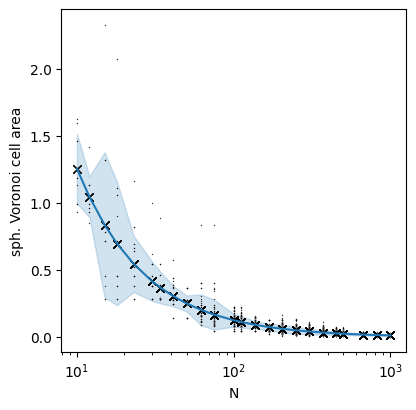

In [9]:
conv_obj = ConvergenceSphereGridFactory("cube3D", dimensions=3, use_saved=USE_SAVED, N_set=DEFAULT_NS)
conv_plot = ConvergenceSphereGridPlot(conv_obj)
conv_plot.make_voronoi_area_conv_plot(save=False)
conv_plot.ax.set_xscale("log")
plt.show()

In [10]:
pcsgp = PanelConvergenceSphereGridPlots(3, use_saved=USE_SAVED, N_set=DEFAULT_NS)
pcsgp.make_all_voronoi_area_plots(save=False)
plt.show()

AssertionError: 2x3=/=7

## Position grids and Voronoi volumes

Next step: create a position grid as a combination of a translation grid and points on a unit sphere. Now, we want spherical Vornoi cells that lie in between layers of points so that the grid point is in the middle of a cell. Also, new surfaces emerge: not only spherical surfaces between layers of points, but also flat surfaces between neighbouring points in the same layer.

In [ ]:
full_grid = FullGrid(b_grid_name="zero", o_grid_name="cube3D_24", t_grid_name="[1.5, 3]", use_saved=False)
fgp = FullGridPlot(full_grid)
ani = fgp.make_position_plot(save=False, animate_rot=True)
show_anim_in_jupyter(ani)

In [ ]:
fgp.make_position_plot(numbered=True, save=False)
ani = fgp.make_full_voronoi_plot(ax=fgp.ax, fig=fgp.fig, save=False, animate_rot=True)
show_anim_in_jupyter(ani)

To calculate the geometrical properties associated with a particular cell, you need to correctly identify voronoi cell vertices associated with this grid point.

In [ ]:
ani = fgp.make_point_vertices_plot(point_index=43, save=False, animate_rot=True)
show_anim_in_jupyter(ani)

In [ ]:
ani = fgp.make_point_vertices_plot(point_index=5, save=False, animate_rot=True)
show_anim_in_jupyter(ani)

You can also obtain distances or areas between any two (neighbouring) points and volumes of Voronoi cells associated with any point.

Units are alwas Angstoms (squared or cubed).

### Distances between centers

In [ ]:
full_voronoi_grid = full_grid.get_full_voronoi_grid()
full_voronoi_grid.get_distance_between_centers(24, 44)

In [ ]:
#sanity check
full_voronoi_grid.get_distance_between_centers(44, 24)

In [ ]:
# inner circle should have smaller distances
full_voronoi_grid.get_distance_between_centers(0, 20)

In [ ]:
# example cells above each other
full_voronoi_grid.get_distance_between_centers(5, 29)

In [ ]:
# or vice versa
full_voronoi_grid.get_distance_between_centers(29, 5)

In [ ]:
# not neighbours
full_voronoi_grid.get_distance_between_centers(40, 5)

In [ ]:
# entire array of distances
all_dist = full_voronoi_grid.get_all_distances_between_centers_as_numpy()
ArrayPlot(all_dist).make_heatmap_plot(save=False)
plt.show()

### Division area between cells

In [ ]:
# outer layer side neighbours
full_voronoi_grid.get_division_area(24, 44)

In [ ]:
# sanity check
full_voronoi_grid.get_division_area(44, 24)

In [ ]:
# recognises non-neighbours
full_voronoi_grid.get_division_area(40, 38)

In [ ]:
# inner layer side neighbours
full_voronoi_grid.get_division_area(0, 20)

In [ ]:
# neighbours where one is above the other
full_voronoi_grid.get_division_area(5, 29)

In [ ]:
# entire array of areas
all_dist = full_voronoi_grid.get_all_voronoi_surfaces_as_numpy()
ArrayPlot(all_dist).make_heatmap_plot(save=False)
plt.show()

### Volume of cells

In [ ]:
# volumes of cells
full_voronoi_grid.get_volume(0)

In [ ]:
full_voronoi_grid.get_volume(25)

To possibly simplify volume calculations to a single volume, we need to see whetherthe volumes of voranoi cells converge (they should converge to the volume of a sphere at smallest Voranoi radius divided by the number of points that lies at a single layer.

In [ ]:
PanelConvergenceFullGridPlots(t_grid_name="[1.5, 3]", use_saved=USE_SAVED, N_set=DEFAULT_NS).make_all_voronoi_volume_plots(save=False)
plt.show()

## Back-mapping molecular positions to grid points

Now that we have full Voronoi discretisation (of positions), we can assign any 3D point to the corresponding Voronoi cell and therefore back-map centers of mass in a simulation to the nearest grid cell. (Exception: if outside the largest Voronoi radius, the point will not be assigned.

In [ ]:
# synthetic example
fgp.make_position_plot(numbered=True, save=False)
ani = fgp.make_full_voronoi_plot(ax=fgp.ax, fig=fgp.fig, save=False, animate_rot=True)
# plot blue point
blue_point = np.array([[15, 3.5, 7]])
fgp.ax.scatter(*blue_point.T, color="blue")
# find to which Voronoi cell it is assigned
blue_assigned_to = full_grid.point2cell_position_grid(blue_point)
print(f"Blue point is assigned to the grid point with number {blue_assigned_to}")
# repeat with red point
red_point = np.array([[-23, 12, -18.4]])
fgp.ax.scatter(*red_point.T, color="red")
red_assigned_to = full_grid.point2cell_position_grid(red_point)
print(f"Red point is assigned to the grid point with number {red_assigned_to}")
# repeat with yellow point
yellow_point = np.array([[-29, -30.5, 36]])
fgp.ax.scatter(*yellow_point.T, color="yellow")
yellow_assigned_to = full_grid.point2cell_position_grid(yellow_point)
print(f"Yellow point is assigned to the grid point with number {yellow_assigned_to}")
show_anim_in_jupyter(ani)

Mick has prepared two studies of the same system (trypsin with an ammonium ion in implicit water).
 1) a classical simulation with openMM, step 2fs, 1mio steps, writing out each picosecond (500 steps)
 2) a generation of a 8x512 grid with molgri combined with brief constrained optimisation at each grid point
 
We can first analyse this data by back-assigning COMs to cells. We can use the same grid as used in the production (then the assignments should mostly be one per cell) or a different, perhaps more coarse grid.

Since in a real simulation the ammonium ion moves around the cell a lot, we use a larger linear grid.

### Simulation data assignment

In [ ]:
from molgri.molecules.parsers import ParsedEnergy, FileParser

def load_simulation_data():
    path_energy = "/home/mdglasius/Modelling/trypsin_normal/nobackup/outputs/data.txt"
    df = pd.read_csv(path_energy)
    energies = df['Potential Energy (kJ/mole)'].to_numpy()[:, np.newaxis]
    pe = ParsedEnergy(energies=energies, labels=["Potential Energy"], unit="(kJ/mole)")
    pt_parser = FileParser(
             path_topology="/home/mdglasius/Modelling/trypsin_normal/inputs/trypsin_probe.pdb",
             path_trajectory="/home/mdglasius/Modelling/trypsin_normal/nobackup/outputs/aligned_traj.dcd")
    parsed_trajectory = pt_parser.get_parsed_trajectory(default_atom_selection="segid B")
    parsed_trajectory.energies = pe
    return parsed_trajectory

def load_molgri_data():
    path_energy = "/home/mdglasius/Modelling/trypsin_test/output/measurements/temp_minimized.csv"
    df = pd.read_csv(path_energy)
    energies = df['potential'].to_numpy()[:, np.newaxis]
    pe = ParsedEnergy(energies=energies, labels=["Potential Energy"], unit="(kJ/mole)")
    pt_parser = FileParser(
             path_topology="/home/mdglasius/Modelling/trypsin_test/output/pt_files/final_trypsin_NH4_o_ico_512_b_zero_1_t_2153868773.gro",
             path_trajectory="/home/mdglasius/Modelling/trypsin_test/output/pt_files/minimizedPT.pdb")
    parsed_trajectory = pt_parser.get_parsed_trajectory(default_atom_selection="not protein")
    parsed_trajectory.energies = pe
    return parsed_trajectory


def plot_histogram(my_parsed_trajectory, my_fullgrid):
    fig, ax = plt.subplots(1, 1)
    # plot the distribution of assignments
    coms, assignments = my_parsed_trajectory.assign_coms_2_grid_points(full_grid=my_fullgrid)
    bins = np.arange(0, len(my_fullgrid.get_flat_position_grid()))
    sns.histplot(assignments, bins=bins, discrete=True)
    ax2 = ax.twinx()
    if len(bins) < 50:
        ax2.set_xticks(bins)
    else:
        ax2.set_xticks([])
    energies = my_parsed_trajectory.get_all_energies("Potential Energy")
    sns.scatterplot(x=assignments, y=energies.squeeze(), ax=ax2, color="black")
    ax2.set_ylabel("Potential energy (kJ/mole)")
    ax.set_xlabel("Position cell index")

In [ ]:
# a real simulation example
# a very coarse grid to visually inspect assignments

parsed_sim = load_simulation_data()
# define some full grid to assign to
full_grid = FullGrid(t_grid_name="[5, 15]", o_grid_name="ico_10", b_grid_name="zero")
plot_histogram(parsed_sim, full_grid)

plt.show()

In [ ]:
# plot points and color them according to their belonging
tp = TrajectoryPlot(parsed_sim)
ani = tp.make_COM_plot(animate_rot=True, projection="3d", save=False, fg = full_grid)
show_anim_in_jupyter(ani)

In [ ]:
# a much finer grid
fine_grid = FullGrid(t_grid_name="linspace(3, 13, 8)", o_grid_name="ico_50", b_grid_name="zero")
plot_histogram(parsed_sim, fine_grid)
plt.show()

Not too much correlation between low energy and high count - the energy is probably highly depended on fine protein structure and not so much on the small ion probe.

### Molgri data assignment

In [ ]:
molgri_pt = load_molgri_data()

tp = TrajectoryPlot(molgri_pt)

rough_grid = FullGrid(t_grid_name="[1, 2]", o_grid_name="ico_12", b_grid_name="zero")

ani = tp.make_COM_plot(animate_rot=True, projection="3d", save=False, fg=rough_grid)
show_anim_in_jupyter(ani)

In [ ]:
plot_histogram(molgri_pt, rough_grid)
plt.show()

In [ ]:
# and a super fine grid where we expect one point per cell
# (some differences due to removed points or optimisation movement)
super_fine_grid = FullGrid(t_grid_name="linspace(0.8, 2.5, 8)", o_grid_name="ico_512", b_grid_name="zero")
plot_histogram(molgri_pt, super_fine_grid)

plt.show()

## Transion/rate matrix

Using the same data assigned to any FullGrid we can create
 1) transition matrix from simulation data by counting transitions between cells
 2) rate matrix from molgri data using geometric properties of FullGrid and potential energies at centers of cells

 $ Q_{ij} (adj.) = \frac{D}{h_{ij}} \frac{S_{ij}}{V_i} \sqrt{\frac{\pi_j}{\pi_i}}$

### Transition matrix

In [ ]:
parsed_sim = load_simulation_data()
# define some full grid to assign to
full_grid = FullGrid(t_grid_name="linspace(3, 13, 4)", o_grid_name="ico_20", b_grid_name="zero")

combined_sim = SimulationHistogram(parsed_sim, full_grid)
msm = MSM(combined_sim, use_saved=USE_SAVED)
transition_matrix = msm.get_transitions_matrix()
ArrayPlot(transition_matrix[0]).make_heatmap_plot(save=False)
plt.show()

In [ ]:
tp_msm = TransitionPlot(msm)
tp_msm.make_its_plot(save=False)
plt.show()

In [ ]:
tp_msm.make_eigenvalues_plot(save=False)
plt.show()

In [ ]:
tp_msm.make_eigenvectors_plot(save=False)
plt.show()

In [ ]:
ani = tp_msm.make_one_eigenvector_plot(0, projection="3d", animate_rot=True, save=False)
show_anim_in_jupyter(ani)

### Rate matrix

In [ ]:
molgri_pt = load_molgri_data()

tp = TrajectoryPlot(molgri_pt)

full_grid_m = FullGrid(t_grid_name="linspace(0.8, 1.5, 4)", o_grid_name="ico_20", b_grid_name="zero")

combined_molgri = SimulationHistogram(molgri_pt, full_grid_m)
sqra = SQRA(combined_molgri, use_saved=USE_SAVED)
rates_matrix = sqra.get_transitions_matrix(energy_type="Potential Energy")
ArrayPlot(rates_matrix[0]).make_heatmap_plot(save=False)
plt.show()

In [ ]:
tp_sqra = TransitionPlot(sqra)
tp_sqra.make_its_plot(save=False, as_line=True)
plt.show()

In [ ]:
tp_sqra.make_eigenvalues_plot(save=False)
plt.show()

In [ ]:
tp_sqra.make_eigenvectors_plot(save=False)
plt.show()

In [ ]:
ani = tp_sqra.make_one_eigenvector_plot(1, projection="3d", animate_rot=True, save=False)
show_anim_in_jupyter(ani)

Going forward:
 1) This is all implemented in a pretty slow way - useful for setting up regression tests, but will probably need to be adapted completely for large systems
 2) need analytically solvable 3D potentials to test the rate matrix
 3) Discretisation of internal rotations - would be a challenge to implement but possibly manageable
 4) Move onto analysing real systems (maybe one where we already have good simulation data?)

